In [58]:
import os, sys
import pathlib
import os
print(os.getcwd()) #print working dir
# os.chdir(os.path.dirname(sys.path[0]))
# os.chdir("..")
print(os.getcwd()) #print working dir
from importlib import reload
os.sys.path.insert(0, './src')
import analyze_utilities_v2
reload(analyze_utilities_v2)

import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
pd.set_option("display.precision", 8)

output_path = './results/imagenet/figures'
is_plot_title = False
is_save_fig = True


c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml
c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml
c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml


# 1. Imagenet results paths

    # All tests were performed on the imagenet evaluation subset which includes all the samples for the first 100 classes (50 samples per each class for a total of 5000 samples).
    #
    # Experiments:
    # 1. pNML Accuracy Vs. Refinement strength (\lambda) - Shows the trade-off between natural and robust accuracy
    # 2. Accuracy Vs. PGD-attack strength (\epsilon); with\ without  pNML - Shows that pNML improve accuracy.
    # 3. Accuracy Vs. Adaptive-attack & PGD-attack strength (\epsilon) - Shows that adaptive attack is not working
    # 4. TODO: blackbox attack Accuracy Vs. Blackbox-attack for different epsilons strength (\epsilon) - Shows that pNML improve accuracy compared to blackbox without pNML
    # PGD attack properties: "pgd_iter": 50, "pgd_step": 0.00392156862, "pgd_test_restart_num": 10
    # For 1. "epsilon": 0.0156862745098 was selected.
    # For 2. lambda = 0.01176 (refinement strength)
    # For 3. "epsilon": [0.0156, 0.0313, 0.0627] was selected.; lambda = 0.01176(refinement strength). indices: 1 per label, 100 in total.

### 1.1. pNML Accuracy Vs. Refinement strength (\lambda)

In [37]:
natural_acc_vs_lambda_res_path = "./output/imagenet_diff_fix_natural"
pgd_acc_vs_lambda_res_path = "./output/imagenet_diff_fix_pgd"

### 1.2.  Accuracy Vs. attack strength (\epsilon); with\ without  pNML 

In [10]:
pgd_nopnml_diff_eps_path = "./results/imagenet/imagenet_pgd_diff_eps"
pgd_pnml_diff_eps_path = "./results/imagenet/imagenet_pgd_diff_eps_pnml_lambda_01176"

### 1.3.  Accuracy Vs. Adaptive-attack & PGD-attack strength (\epsilon)

In [11]:
adaptive_diff_eps_path = "./results/imagenet/imagenet_adaptive"

# 2. Results

### 2.1. pNML Accuracy Vs. Refinement strength (\lambda)

In [45]:
indices = [i for i in range(0, 9999+1, 1)]


subdir_list = analyze_utilities_v2.get_subdir_list(natural_acc_vs_lambda_res_path)
print(subdir_list)
df_natural_vs_lambda = analyze_utilities_v2.results_dirs_to_df(subdir_list)
df_natural_vs_lambda = df_natural_vs_lambda.sort_values("lambda", ignore_index=True)

subdir_list = analyze_utilities_v2.get_subdir_list(pgd_acc_vs_lambda_res_path)
print(subdir_list)
df_pgd_vs_lambda = analyze_utilities_v2.results_dirs_to_df(subdir_list)
df_pgd_vs_lambda = df_pgd_vs_lambda.sort_values("lambda", ignore_index=True)

[WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200430_175325'), WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200430_192930'), WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200430_210519'), WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200430_224105'), WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200501_001649'), WindowsPath('output/imagenet_diff_fix_natural/imagenet_adversarial_results_20200501_101625')]
[WindowsPath('output/imagenet_diff_fix_pgd/imagenet_adversarial_results_20200501_213817'), WindowsPath('output/imagenet_diff_fix_pgd/imagenet_adversarial_results_20200501_213821'), WindowsPath('output/imagenet_diff_fix_pgd/imagenet_adversarial_results_20200501_213825'), WindowsPath('output/imagenet_diff_fix_pgd/imagenet_adversarial_results_20200501_213829'), WindowsPath('output/imagenet_diff_fix_pgd/imagenet_adversarial_results_202

samples in df_natural_vs_lambda:
 0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
Name: samples, dtype: object
samples in df_pgd_vs_lambda:
 0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
Name: samples, dtype: object


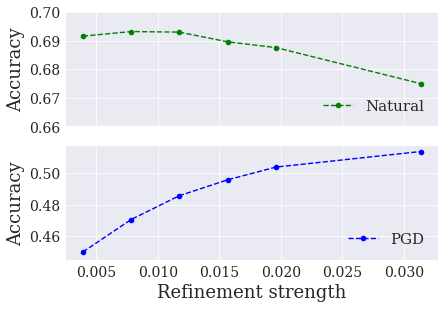

In [70]:
# plt.figure(1)

print("samples in df_natural_vs_lambda:\n {}".format(str(df_natural_vs_lambda.loc[:,'samples'])))
print("samples in df_pgd_vs_lambda:\n {}".format(str(df_pgd_vs_lambda.loc[:,'samples'])))

gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0])
ax1.plot(df_natural_vs_lambda.loc[:,'lambda'], df_natural_vs_lambda.loc[:,'acc'], 'go--', label='Natural')
ax1.set_ylabel('Accuracy')
labels = [item.get_text() for item in ax1.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax1.set_xticklabels(empty_string_labels)
# ax1.set_xlabel('Refinement strength')
ax1.set_ylim([0.66, 0.7])
ax1.legend(fontsize=15, ncol=1, loc=4)

ax2 = plt.subplot(gs[1])
ax2.plot(df_pgd_vs_lambda.loc[0:5,'lambda'], df_pgd_vs_lambda.loc[0:5, 'acc'], 'bo--', label='PGD')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Refinement strength')
ax2.set_ylim([0.445, 0.517])

ax2.legend(fontsize=15, ncol=1, loc=4)
# plt.xlabel('Refinement strength')
# plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_imagenet_acc_vs_lambda.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None

In [12]:
print(pathlib.Path('.').absolute())
l = "./output"
p = pathlib.Path(l)
p.exists()

c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml


True

### 2.3 Accuracy Vs. Adaptive-attack & PGD-attack strength

Used samples 100
[WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0156'), WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0313'), WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0627'), WindowsPath('results/imagenet/imagenet_adaptive/imagenet_noattack')]


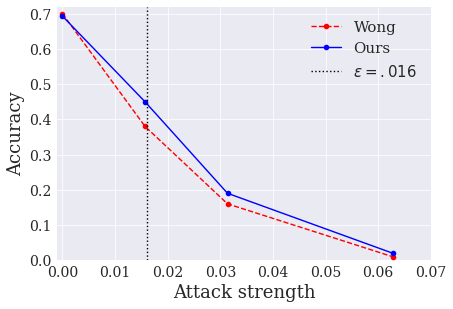

df_pgd_nopnml:
    acc      epsilon  mean loss samples    mean size  iter    pgd_step  \
0   0.7            0  1.2093979     100   1.20939789   0.0  0.00000000   
1  0.53     0.007842  1.7360904     100   1.73609039  50.0  0.00392157   
2  0.38  0.015686275  2.4232231     100   2.42322311  50.0  0.00392157   
3  0.23  0.023529412  3.3470316     100   3.34703156  50.0  0.00392157   
4  0.16  0.031372549  4.5691217     100   4.56912170  50.0  0.00392157   
5  0.06  0.047058824  7.7630096     100   7.76300964  50.0  0.00392157   
6  0.01  0.062745098  11.056877     100  11.05687744  50.0  0.00392157   
7     0  0.078431373  14.005032     100  14.00503174  50.0  0.00392157   
8     0  0.094117647  16.736167     100  16.73616699  50.0  0.00392157   

   restarts      lambda  
0       0.0  0.01176000  
1      10.0  0.00692157  
2      10.0  0.00692157  
3      10.0  0.00692157  
4      10.0  0.00692157  
5      10.0  0.00692157  
6      10.0  0.00692157  
7      10.0  0.00692157  
8      10.

In [56]:
indices = [i for i in range(0, 4999+1, 50)]
print("Used samples {}".format(len(indices)))
subdir_list = analyze_utilities_v2.get_subdir_list(adaptive_diff_eps_path)
print(subdir_list)
df_adaptive = analyze_utilities_v2.results_dirs_to_df(subdir_list)
df_adaptive = df_adaptive.sort_values("epsilon", ignore_index=True)

subdir_list = analyze_utilities_v2.get_subdir_list(pgd_nopnml_diff_eps_path)
df_pgd_nopnml = analyze_utilities_v2.results_dirs_to_df(subdir_list, indices).sort_values("epsilon", ignore_index=True)


subdir_list = analyze_utilities_v2.get_subdir_list(pgd_pnml_diff_eps_path)
df_pgd_pnml = analyze_utilities_v2.results_dirs_to_df(subdir_list, indices).sort_values("epsilon", ignore_index=True)

plt.figure(0)
plt.plot(df_pgd_nopnml.loc[df_pgd_nopnml['epsilon'].isin(df_adaptive['epsilon']), 'epsilon'],
         df_pgd_nopnml.loc[df_pgd_nopnml['epsilon'].isin(df_adaptive['epsilon']), 'acc'], 'ro--', label='Wong')# PGD on Wong model
plt.plot(df_adaptive['epsilon'], df_adaptive['acc'], 'bo-', label='Ours')  # Adaptive on our scheme
# plt.plot(df_pgd_pnml.loc[df_pgd_pnml['epsilon'].isin(df_adaptive['epsilon']), 'epsilon'],
#          df_pgd_pnml.loc[df_pgd_pnml['epsilon'].isin(df_adaptive['epsilon']), 'acc'], 'yo--', label='PGD our scheme')

axes = plt.gca()
axes.set_ylim([0.00, 0.72])
axes.set_xlim([-0.001, 0.07])
plt.axvline(x=0.016, color='k', linestyle='dotted', label='$\epsilon=.016$')
plt.legend(fontsize=15, ncol=1, loc=1)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_subset_imagenet_best_vs_epsilon.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print("df_pgd_nopnml:\n" + str(df_pgd_nopnml))
print("df_pgd_pnml:\n" + str(df_pgd_pnml))
print("df_adaptive:\n" + str(df_adaptive))


      

Show evaluation for the complete dataset (adaptive attack is not included since it is only on 100 samples:

Used samples 5000
param_path: results\imagenet\imagenet_pgd_diff_eps\imagenet_adversarial_results_20200503_121516\params.json param_path_l: ['results\\imagenet\\imagenet_pgd_diff_eps\\imagenet_adversarial_results_20200503_121516\\params.json']
param_path: results\imagenet\imagenet_pgd_diff_eps\imagenet_adversarial_results_20200503_121519\params.json param_path_l: ['results\\imagenet\\imagenet_pgd_diff_eps\\imagenet_adversarial_results_20200503_121519\\params.json']
param_path: results\imagenet\imagenet_pgd_diff_eps\imagenet_adversarial_results_20200503_121523\params.json param_path_l: ['results\\imagenet\\imagenet_pgd_diff_eps\\imagenet_adversarial_results_20200503_121523\\params.json']
param_path: results\imagenet\imagenet_pgd_diff_eps\imagenet_adversarial_results_20200503_121527\params.json param_path_l: ['results\\imagenet\\imagenet_pgd_diff_eps\\imagenet_adversarial_results_20200503_121527\\params.json']
param_path: results\imagenet\imagenet_pgd_diff_eps\imagenet_adversarial_result

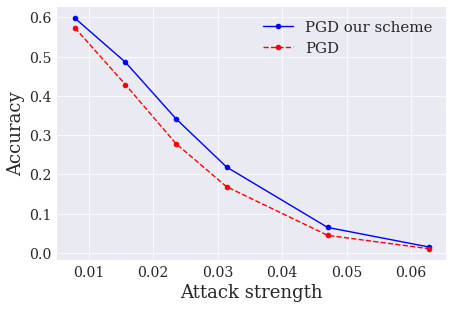

df_pgd_nopnml:
      acc      epsilon  mean loss samples    mean size  iter    pgd_step  \
0  0.5734     0.007842  1.5792138    5000   1.57921377  50.0  0.00392157   
1  0.4286  0.015686275  2.2400135    5000   2.24001348  50.0  0.00392157   
2  0.2782  0.023529412  3.1758967    5000   3.17589668  50.0  0.00392157   
3  0.1684  0.031372549  4.4373023    5000   4.43730234  50.0  0.00392157   
4  0.0444  0.047058824  7.7574156    5000   7.75741563  50.0  0.00392157   
5  0.0104  0.062745098  11.336915    5000  11.33691484  50.0  0.00392157   
6  0.0022  0.078431373  14.521089    5000  14.52108906  50.0  0.00392157   
7  0.0006  0.094117647  17.164594    5000  17.16459375  50.0  0.00392157   

   restarts      lambda  
0      10.0  0.00692157  
1      10.0  0.00692157  
2      10.0  0.00692157  
3      10.0  0.00692157  
4      10.0  0.00692157  
5      10.0  0.00692157  
6      10.0  0.00692157  
7      10.0  0.00692157  
df_pgd_pnml:
      acc      epsilon  mean loss samples   mean size

In [29]:
indices = [i for i in range(0, 4999+1, 1)]
print("Used samples {}".format(len(indices)))

subdir_list = analyze_utilities_v2.get_subdir_list(pgd_nopnml_diff_eps_path)
df_pgd_nopnml = analyze_utilities_v2.results_dirs_to_df(subdir_list, indices).sort_values("epsilon", ignore_index=True)

subdir_list = analyze_utilities_v2.get_subdir_list(pgd_pnml_diff_eps_path)
df_pgd_pnml = analyze_utilities_v2.results_dirs_to_df(subdir_list, indices).sort_values("epsilon", ignore_index=True)

merged_df = pd.merge(df_pgd_nopnml.loc[:,['epsilon','acc']], 
                     df_pgd_pnml.loc[:,['epsilon','acc']].rename(columns={'acc': 'pgd_pnml_acc'}),on='epsilon')

plt.figure(0)
plt.plot(merged_df.loc[:, 'epsilon'], merged_df.loc[:, 'pgd_pnml_acc'], 'bo-', label='PGD our scheme')
plt.plot(merged_df.loc[:, 'epsilon'], merged_df.loc[:, 'acc'], 'ro--', label='PGD')


plt.legend(fontsize=15, ncol=1, loc=1)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_imagenet_acc_vs_attack_strength.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print("df_pgd_nopnml:\n" + str(df_pgd_nopnml))
print("df_pgd_pnml:\n" + str(df_pgd_pnml))
print("df_adaptive:\n" + str(df_adaptive))